# Exploratory Data Analysis



#### Contextual information.
#### Course code: InfT5050.
#### Lecture date: 29th november.
#### Student name: Swarn Singh Warshaneyan.
#### Identity code: IT23139.

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# Function to load a toy dataset with some added nans
def load_iris_dataset():
  # Load the Iris dataset
  iris = load_iris()
  df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

  # Convert target to categorical
  df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

  # Add random NaN values
  np.random.seed(42)  # For reproducibility
  nan_indices = [(row, col) for row in range(df.shape[0]) for col in range(df.shape[1])]
  random_nan = np.random.choice(len(nan_indices), size=10, replace=False)  # Add 10 NaNs

  for idx in random_nan:
      row, col = nan_indices[idx]
      df.iloc[row, col] = np.nan

  return df


This is your EDA collab notebook. The EDA is rather an art than a formalised process, and I expect that you will start with the steps below and, next, use your creativity to get insights from the data. The primary steps:


1.   Load the data using your_df_name = load_iris_dataset()
2.   Take a look at the data using df.head() and df.tail(), df.describe()
3.   Clean the data, delete/impute NaNs
4.   Check if there are any outliers
5.   Plot scatter of the data
6.   Check correlations between data columns
7.   Decode categorical target values (species) to numerical
8.   Make your own analysis


In [42]:
"""Loading the data set."""
df = load_iris_dataset()
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,NaN,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [43]:
#iris.target_names

In [44]:
"""Taking a look at the data set. Part 01."""
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [45]:
"""Taking a look at the data set. Part 02."""
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,NaN,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [46]:
"""Taking a look at the data set. Part 03."""
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,147.000000,147.000000,149.000000,148.000000
mean,5.835374,3.062585,3.756376,1.198649
std,0.829326,0.438274,1.771140,0.760951
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.350000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [47]:
"""Getting additional information about the data set. Part 01."""
df.shape

(150, 5)

In [48]:
"""Getting additional information about the data set. Part 02."""
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  147 non-null    float64 
 1   sepal width (cm)   147 non-null    float64 
 2   petal length (cm)  149 non-null    float64 
 3   petal width (cm)   148 non-null    float64 
 4   species            149 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


In [49]:
"""Checking the data set for missing values."""
df.isnull().sum()

,0
sepal length (cm),3
sepal width (cm),3
petal length (cm),1
petal width (cm),2
species,1


In [50]:
"""Removing duplicate values fromt he data set."""
data = df.drop_duplicates(subset ="species",)
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
50,NaN,3.2,4.7,1.4,versicolor
59,5.2,2.7,3.9,1.4,NaN
100,6.3,3.3,6.0,2.5,virginica


In [51]:
"""Checking the data set for balance between rows."""
df.value_counts("species")

,count
species,
setosa,50
virginica,50
versicolor,49


In [52]:
"""Cleaning the data set."""
numeric_df = df.select_dtypes(include=np.number)  # Select numeric columns
df_cleaned = df.fillna(numeric_df.mean())

<Axes: >

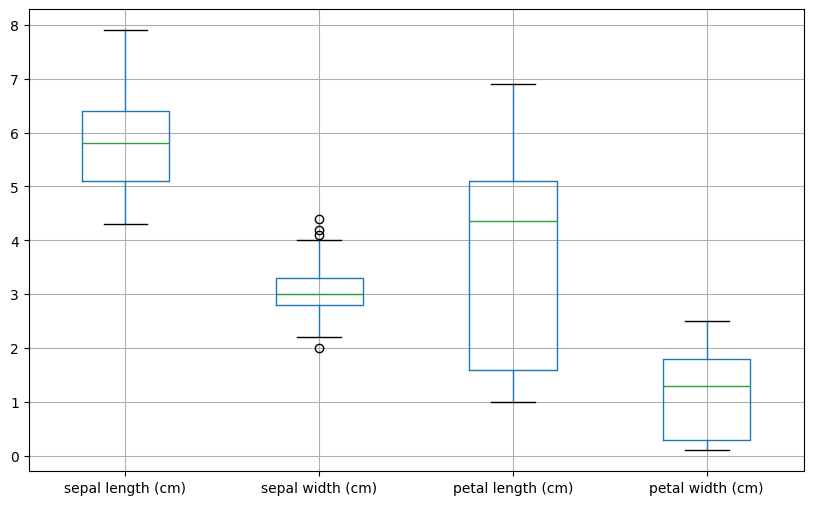

In [53]:
"""Checking the data set for outliers."""
plt.figure(figsize=(10,6))
df_cleaned.boxplot()

Student remarks:

In the graph visible above, for the sepal width column, the values above 04 units and below 02 units are behaving as outliers.

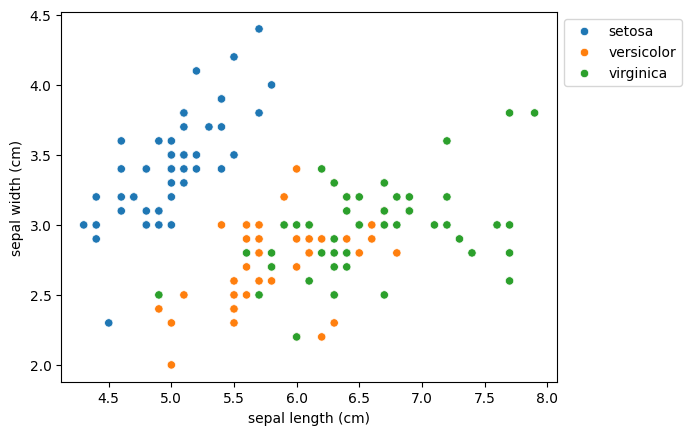

In [54]:
"""
Drawing a scatter plot of the data set. Part 01.
Comparing sepal length with sepal width for the data set.
"""
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)',
                hue='species', data=df, )
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

Student remarks:

In the graph visible above, we can observe the following:

01. The flowers of Setosa have smaller sepal lengths but bigger sepal widths.
02. The flowers of Versicolor are in the middle of the other two species in terms of sepal length & sepal width values.
03. The flowers of Virginica have larger sepal lengths but smaller sepal widths.

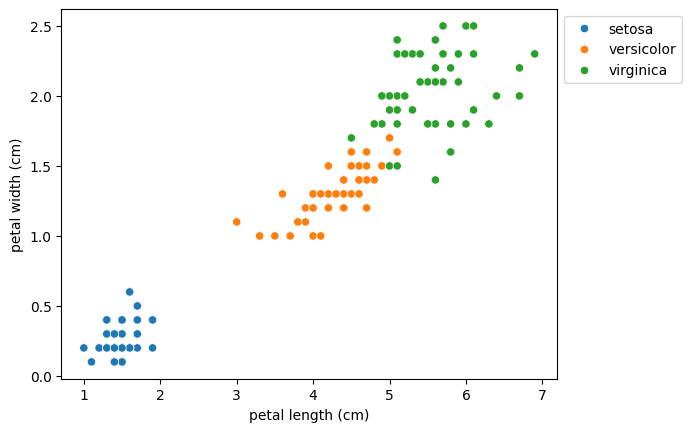

In [55]:
"""
Drawing a scatter plot of the data set. Part 02.
Comparing petal length with petal width for the data set.
"""
sns.scatterplot(x='petal length (cm)', y='petal width (cm)',
                hue='species', data=df, )
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

Student remarks:

In the graph visible above, we can observe the following:

01. The flowers of Setosa have the smallest petal length & petal width values overall.
02. The flowers of Versicolor are in the middle in terms of petal length & petal width values.
03. The flowers of Virginica have the biggest petal length & petal width values overall.

In [56]:
"""Checking the data set for correlations between columns. Part 01."""
data.select_dtypes(include=['number']).corr(method='pearson')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,0.204419,0.878255,0.889964
sepal width (cm),0.204419,1.000000,-0.267935,-0.263249
petal length (cm),0.878255,-0.267935,1.000000,0.974371
petal width (cm),0.889964,-0.263249,0.974371,1.000000


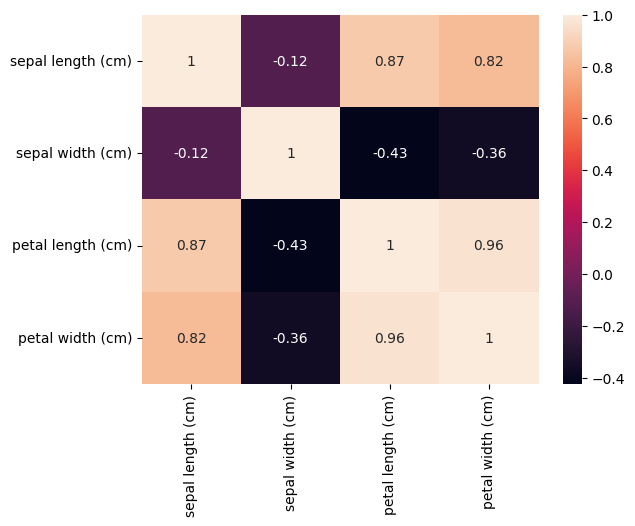

In [57]:
"""Checking the data set for correlations between columns. Part 02"""
sns.heatmap(df.select_dtypes(include=['number']).corr(method='pearson'),
            annot = True);
plt.show()

Student remarks:

In the graph visible above, we can observe the following:

01. There's a high degree of correlation between petal widths & petal lengths.
02. There's a low degree of correlation between petal lengths & sepal widths.
03. There's a low degree of correlation between petal widths & sepal widths.
04. There's a moderate degree of correlation between petal widths & sepal lengths.
05. There's a moderate degree of correlation between petal lengths & sepal lengths.
06. There's a low degree of correlation between sepal lengths & sepal widths.

Based on out observations, we can use either the petal lengths or the petal widths to make predictions about the other one.

In [58]:

"""Decoding the categorical target values (species) to numerical."""
for i, species in enumerate(df['species'].cat.categories):
    print(f"{species}: {i}")

setosa: 0
versicolor: 1
virginica: 2


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packa

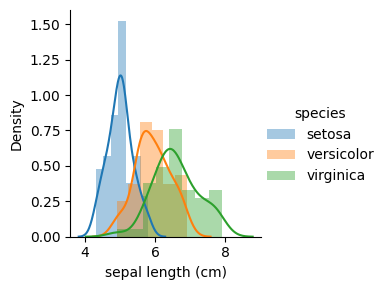

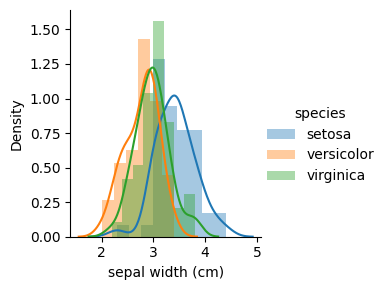

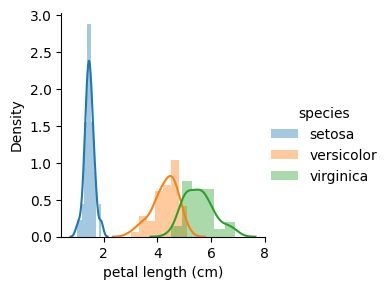

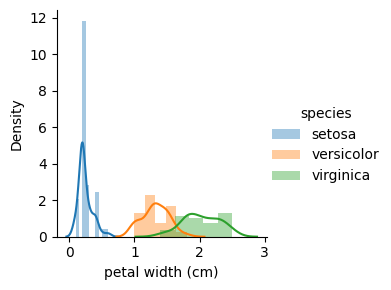

In [59]:
"""
Making my own analysis.
Histograms with Distplot.
"""

plot = sns.FacetGrid(df, hue="species")
plot.map(sns.distplot, "sepal length (cm)").add_legend()

plot = sns.FacetGrid(df, hue="species")
plot.map(sns.distplot, "sepal width (cm)").add_legend()

plot = sns.FacetGrid(df, hue="species")
plot.map(sns.distplot, "petal length (cm)").add_legend()

plot = sns.FacetGrid(df, hue="species")
plot.map(sns.distplot, "petal width (cm)").add_legend()

plt.show()

Student remarks:

In the graphs visible above, we can observe the following:

01. For the sepal length column, there's a lot of overlap.
02. For the sepal width column, there's a lot of overlap.
03. For the petal length column, there's only a bit of overlap.
04. For the petal width column, there's only a bit of overlap.

Based on out observations, we can use the petal length & petal width columns for classification based on features.

# The end.
## Thank you.